In [1]:
import fitsio
from astropy.table import hstack,vstack,Table
import numpy as np
import matplotlib.pyplot as plt

In [2]:
specfile_obs='/global/homes/h/hiramk/DESI-HighSchool/student_andes/coadd-qso-68002-20200315.fits'
zbestfile_obs='/global/homes/h/hiramk/DESI-HighSchool/student_andes/zbest-qso-68002-20200315.fits'

specfile_sim='/global/cscratch1/sd/hiramk/desi/mocks/tests/test_year1/spectra/monthly-delay0_allfeatures/spectra-16/0/0/spectra-16-0.fits'
truthfile_sim='/global/cscratch1/sd/hiramk/desi/mocks/tests/test_year1/spectra/monthly-delay0_allfeatures/spectra-16/0/0/truth-16-0.fits'
zbestfile_sim='/global/cscratch1/sd/hiramk/desi/mocks/tests/test_year1/spectra/monthly-delay0_allfeatures/spectra-16/0/0/zbest-16-0.fits'

coaddfile_sim='/global/homes/h/hiramk/DESI-HighSchool/student_andes/coadd_sim.fits'

In [3]:
spectra_obs=Table(fitsio.read(specfile_obs))
zbest_obs=Table(fitsio.read(zbestfile_obs))
spectra_sim=Table(fitsio.read(specfile_sim))
zbest_sim=Table(fitsio.read(zbestfile_sim))
bal_meta=Table(fitsio.read(truthfile_sim,ext='BAL_META'))
dla_meta=Table(fitsio.read(truthfile_sim,ext='DLA_META'))

In [4]:
spectra_obs[:5]

WAVELENGTH,TARGET35185923939371431,TARGET35185923947758947,TARGET35185935939273277,TARGET35185935939275605,TARGET35185935947662300
float64,float64,float64,float64,float64,float64
3600.0,2.3636122496754397,3.414925209198168,2.8388920539677955,2.939149291548789,7.4989237392868535
3600.8,2.4749438263403603,3.3575556004291536,2.783893926277046,2.980783456877169,7.597048110517629
3601.6000000000004,2.666010361301889,3.256957717537863,2.67531077718121,3.085417425146307,7.7621916934777
3602.4000000000005,2.885800554780044,3.1351393750191154,2.5222525882651103,3.272542576450347,7.946383571725885
3603.2000000000007,3.08248146125039,3.0104473362849626,2.345810654418959,3.5307691989460688,8.104293304426655


In [5]:
tids=[35185923939371431,35185923947758947,35185935939273277,35185935939275605,35185935947662300]

TARGET35185923939371431


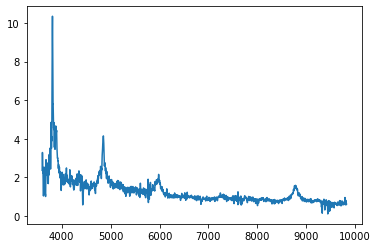

TARGET35185923947758947


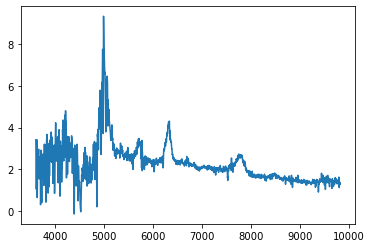

TARGET35185935939273277


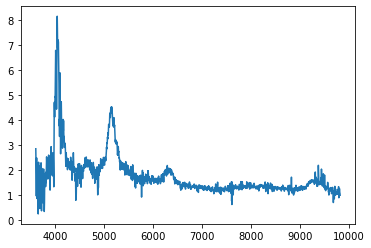

TARGET35185935939275605


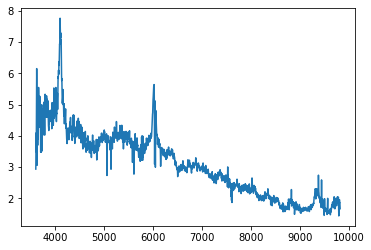

TARGET35185935947662300


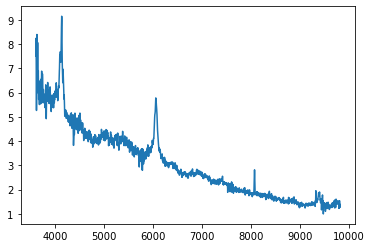

In [6]:
for key in spectra_obs.keys()[1:]:
    print(key)
    plt.plot(spectra_obs['WAVELENGTH'],spectra_obs[key])
    plt.show()

In [7]:
wave=fitsio.read(coaddfile_sim,ext=2)
flux=fitsio.read(coaddfile_sim,ext=3)

In [8]:
truth=Table(fitsio.read(truthfile_sim))
truth.sort('TARGETID')

In [9]:
with_bals = np.isin(truth['TARGETID'],bal_meta['TARGETID'])
with_dlas = np.isin(truth['TARGETID'],dla_meta['TARGETID'])
exposure = truth['EXPTIME']>=3000
redshift = truth['Z']>2.1
#index=np.where(~with_bals&with_dlas&exposure&redshift)[0]

866 3.5053155 120473


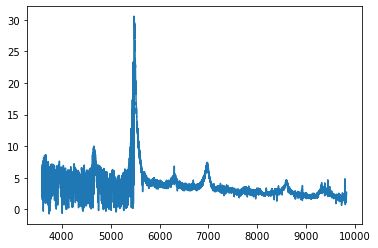

887 2.8472168 120908


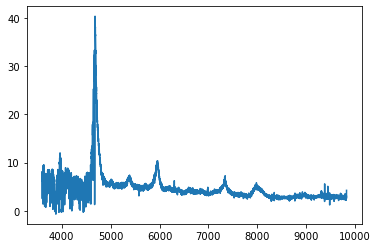

362 2.584358 114082


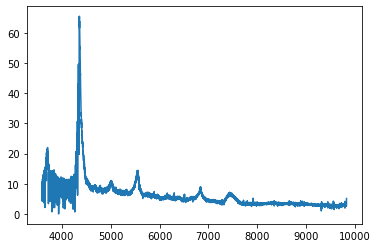

765 2.365201 118739


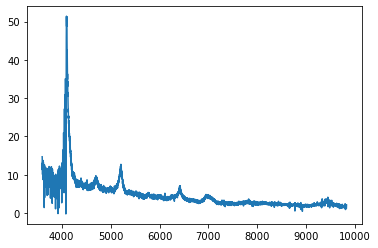

662 2.8163733 117421


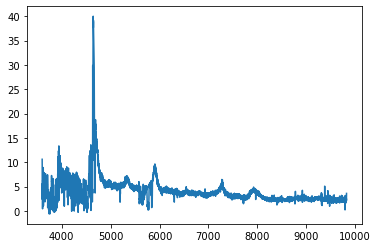

440 2.6628475 114748


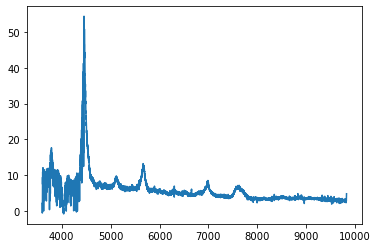

In [10]:
#index=np.random.choice(np.where(truth['EXPTIME']==4000)[0],5,replace=False)
index=[866,887,362,586,765,37,123,662,611,440]
index=[866,887,362,765,662,440]
for i in index:
    print(i,truth['Z'][i],truth['TARGETID'][i])
    plt.plot(wave,flux[i])
    plt.show()

In [11]:
tids_sim=np.array(truth['TARGETID'][index])

In [12]:
from scipy.interpolate import interp1d
new_fluxes=np.zeros([len(spectra_obs),len(tids_sim)])

In [13]:
colnames=[]
for i,ind in enumerate(index):
    id_fixed=tids_sim[i]+tids[np.random.choice(np.arange(5),1,replace=False)[0]]
    colnames.append(f'TARGET{id_fixed}')
    flux_interp = interp1d(wave,flux[ind])
    new_fluxes[:,i] = flux_interp(spectra_obs['WAVELENGTH'])

In [14]:
qsos_sim=Table(new_fluxes,names=colnames)

In [15]:
allqsos=hstack([spectra_obs,qsos_sim])
allqsos.write('student_andes/coadd_QSOmesh.fits',overwrite=True)

In [16]:
mesh_names=np.random.choice(allqsos.keys()[1:],len(allqsos.keys())-1,replace=False)
mesh_names=np.insert(mesh_names,0,'WAVELENGTH')

In [17]:
txtcols=np.array([mesh_names[1:],np.isin(mesh_names[1:],colnames)]).T
np.savetxt('student_andes/truthtable_qsomesh.txt',txtcols,fmt='%20s %s',header='TARGET |  IS SIMULATED?')

TARGET35185923947758947 is NOT MOCK


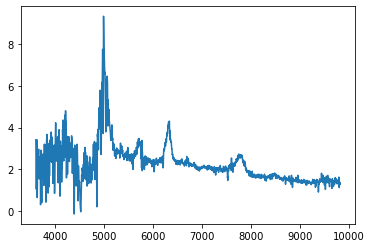

TARGET35185935939394344 is MOCK


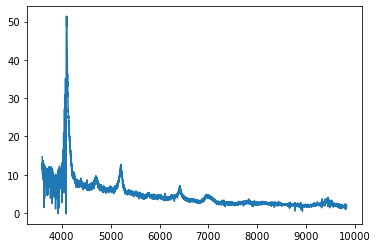

TARGET35185935939394185 is MOCK


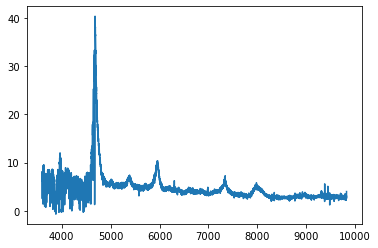

TARGET35185923947873029 is MOCK


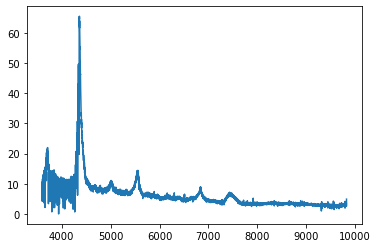

TARGET35185923939371431 is NOT MOCK


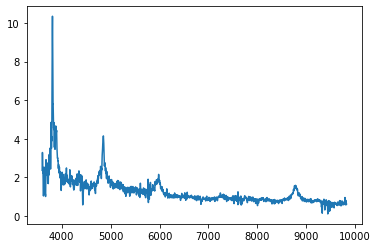

TARGET35185923947873695 is MOCK


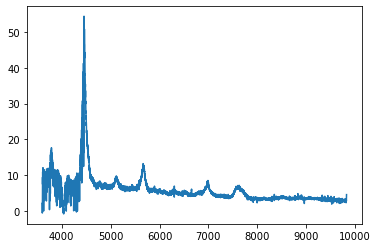

TARGET35185923947879420 is MOCK


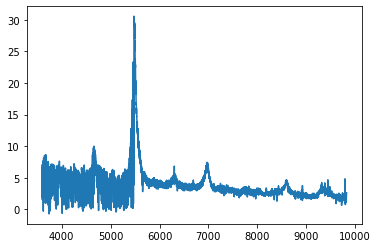

TARGET35185935939273277 is NOT MOCK


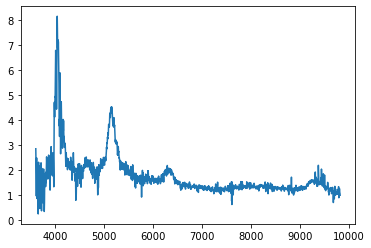

TARGET35185935947662300 is NOT MOCK


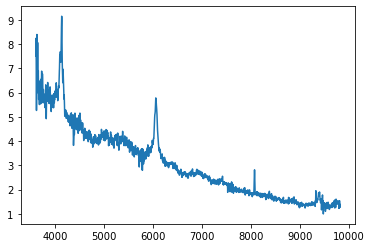

TARGET35185923939488852 is MOCK


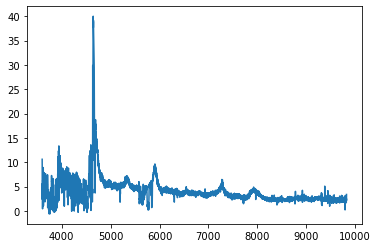

TARGET35185935939275605 is NOT MOCK


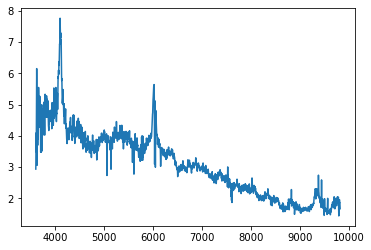

In [18]:
mesh_qso=allqsos[list(mesh_names)]
for key in mesh_qso.keys()[1:]:
    if key in colnames:
        print(f'{key} is MOCK')
    else:
        print(f'{key} is NOT MOCK')
    plt.plot(mesh_qso['WAVELENGTH'],mesh_qso[key])
    plt.show()